In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 4)

In [7]:
import seaborn as sns
%matplotlib inline

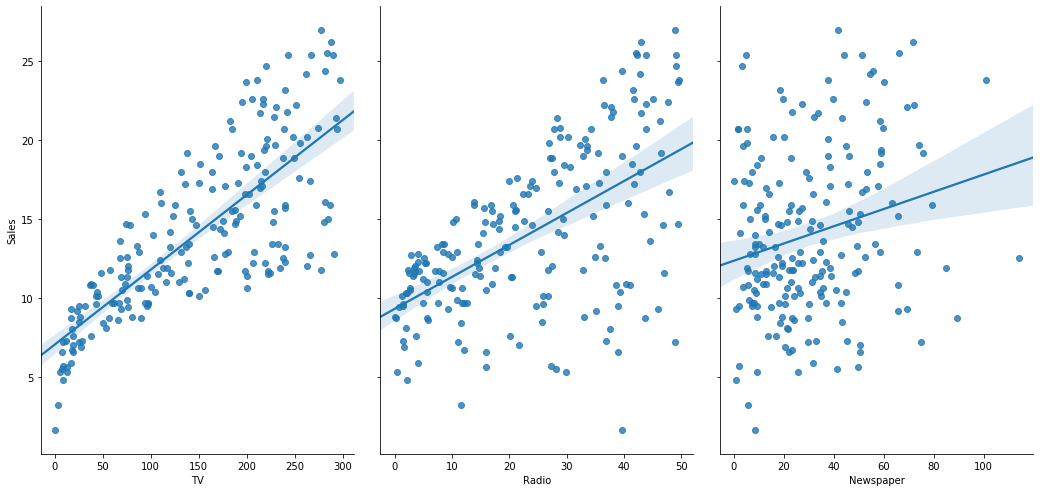

In [12]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7,aspect=0.7, kind='reg')

In [3]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
X.head()
# print(type(X))

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [4]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [23]:
zip(feature_cols, linreg.coef_)

In [24]:
y_pred = linreg.predict(X_test)

In [25]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [26]:
# calc Mean Absolute Error by hand
print((10 + 0 + 20 + 10) / 4)

# calc Mean Absolute using sklearn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [27]:
# calc Mean Squared Error by hand
print((10**2 + 0**2 + 20**2 + 10**2) / 4)
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [28]:
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2) / 4.))

print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [29]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


In [30]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [13]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [14]:
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [15]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print(rmse_scores.mean())

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]
1.6913531708051792


In [17]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6913531708051792


In [19]:
from sklearn.model_selection import GridSearchCV
k_range = range(1, 31)
print(k_range)
param_grid = dict(n_neighbors=k_range)
print(param_grid)

range(1, 31)
{'n_neighbors': range(1, 31)}


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [23]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

In [26]:
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 31)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [30]:
grid.cv_results_

{'mean_fit_time': array([0.00111926, 0.00068028, 0.00070724, 0.00056791, 0.00052159,
        0.00048785, 0.00054696, 0.00047598, 0.00054221, 0.00052664,
        0.00048275, 0.00048184, 0.00057256, 0.00053506, 0.00047731,
        0.00045996, 0.00053596, 0.0005548 , 0.00055983, 0.00069633,
        0.00096936, 0.00097904, 0.00120764, 0.00088933, 0.00060279,
        0.00053673, 0.00046756, 0.000577  , 0.00061579, 0.00047774]),
 'std_fit_time': array([8.81664228e-04, 1.55214306e-04, 2.69130800e-04, 8.41837738e-05,
        4.21025947e-05, 3.85218027e-05, 1.32558991e-04, 3.95861295e-05,
        1.08689735e-04, 1.19222519e-04, 4.73219500e-05, 4.84854532e-05,
        1.34186723e-04, 5.73482477e-05, 5.65729660e-05, 2.59256060e-05,
        1.40172161e-04, 1.28027625e-04, 2.46998298e-04, 3.12004799e-04,
        6.75655966e-04, 7.50029254e-04, 1.26856178e-03, 4.92181332e-04,
        1.65772013e-04, 1.19177852e-04, 2.59064470e-05, 2.01997204e-04,
        1.89697089e-04, 3.16376693e-05]),
 'mean_scor

In [32]:
print(grid.cv_results_[0].parameters)

KeyError: 0